In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic_df.shape[0]

titanic_df.shape[1]

15

In [6]:
titanic_df.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
print((titanic_df.isnull().sum()/ len(titanic_df))* 100)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [12]:
print(titanic_df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [13]:
print(titanic_df['survived'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64


In [14]:
print(titanic_df['survived'].value_counts(normalize=True)* 100)

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [15]:
print(titanic_df['sex'].value_counts())

sex
male      577
female    314
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt

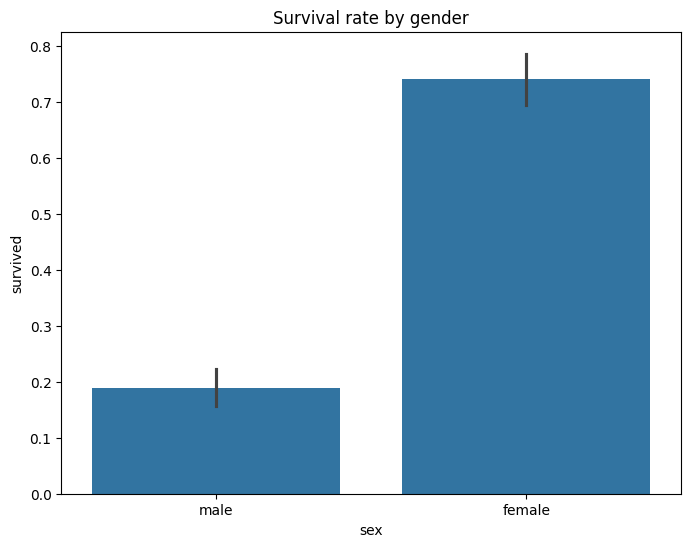

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='survived', data = titanic_df)
plt.title('Survival rate by gender')
plt.show()

In [18]:
def display_univariate_counts(data, column):
  category_counts = data[column].value_counts()
  plt.figure(figsize=(8,6))
  sns.barplot(x=category_counts.index, y=category_counts.values)
  plt.title(f'Count of Each Category in {column}')
  plt.xlabel(f'{column}')
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

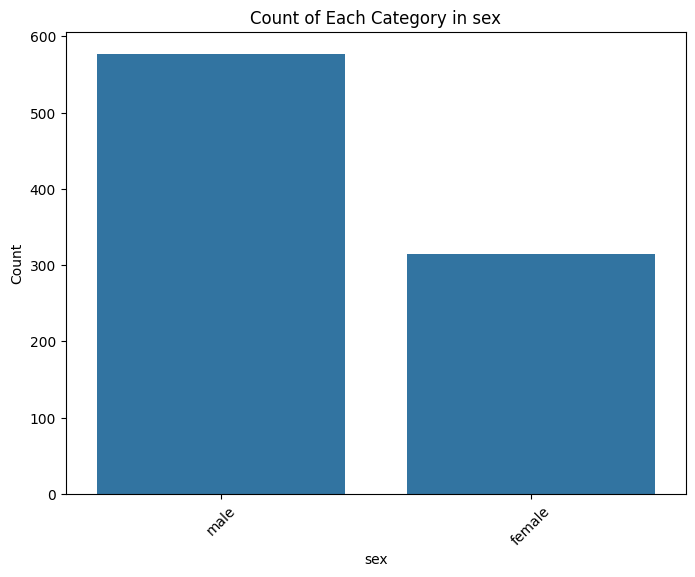

In [19]:
display_univariate_counts(titanic_df, 'sex')

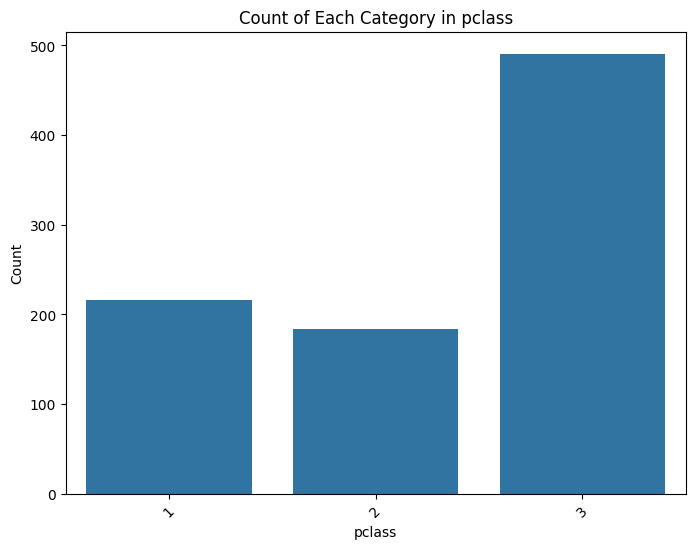

In [20]:
display_univariate_counts(titanic_df, 'pclass')

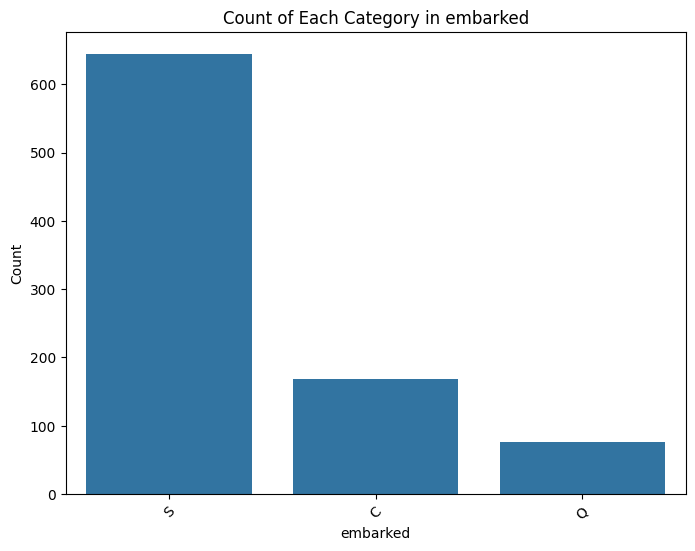

In [21]:
display_univariate_counts(titanic_df, 'embarked')

In [22]:
print(titanic_df['age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


In [23]:
def display_numerical_distributions(data, column, bins=20, kde=True):
  plt.figure(figsize=(8,6))
  sns.histplot(data[column].dropna(), bins=bins, kde=kde)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


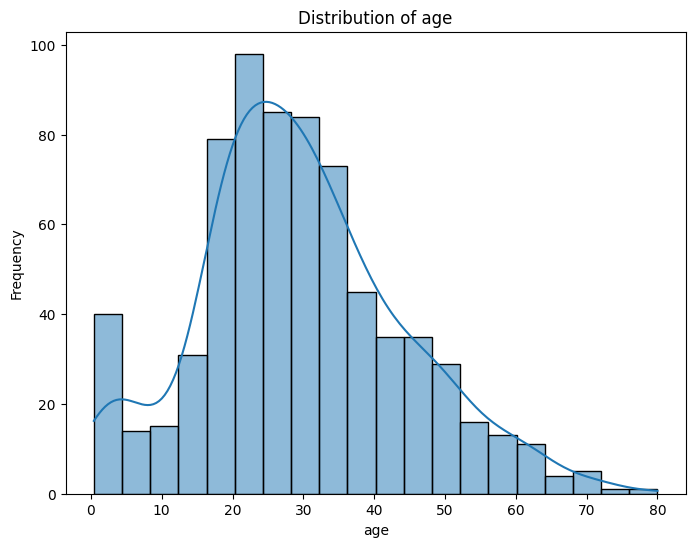

In [24]:
display_numerical_distributions(titanic_df, 'age')

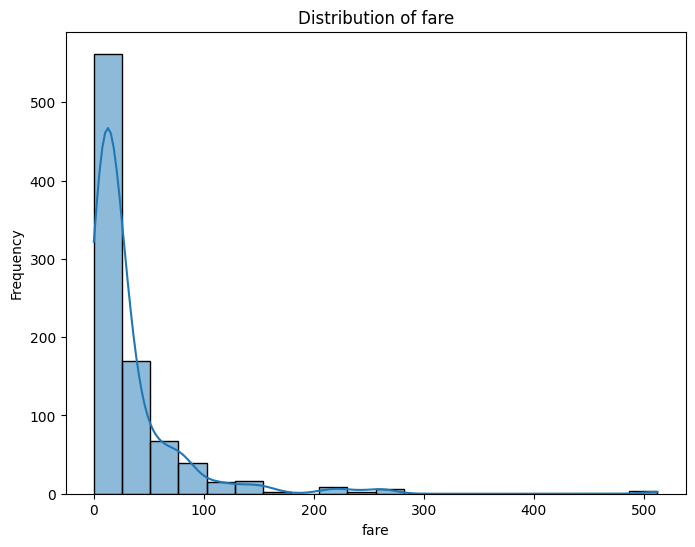

In [25]:
display_numerical_distributions(titanic_df, 'fare')

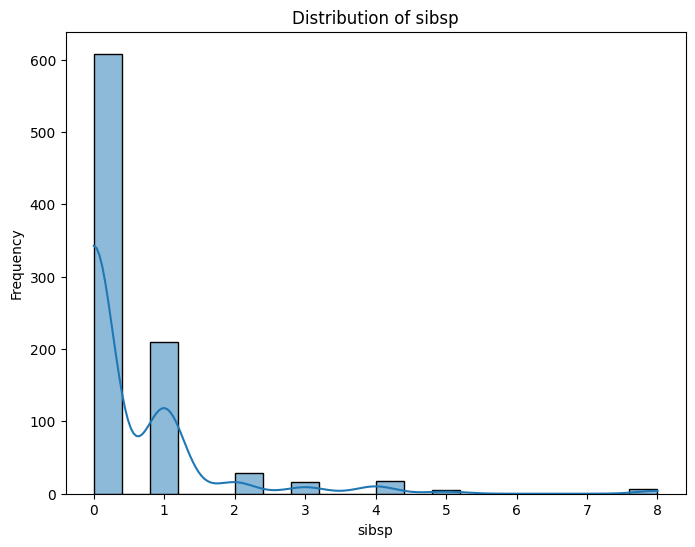

In [26]:
display_numerical_distributions(titanic_df, 'sibsp')

In [36]:
print(titanic_df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [28]:
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)

In [30]:
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)

In [33]:
titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0], inplace=True)

In [35]:
titanic_df.drop('deck', axis=1, inplace=True)

In [41]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,age_band
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2,"(16.336, 32.252]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2,"(32.252, 48.168]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,"(16.336, 32.252]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2,"(32.252, 48.168]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,"(32.252, 48.168]"


In [38]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1

In [40]:
titanic_df['age_band'] = pd.cut(titanic_df['age'], 5)

In [43]:
titanic_df.drop(['alive', 'who', 'adult_male', 'embark_town', 'class'], axis=1, inplace=True)

In [44]:
print(titanic_df.groupby('sex')['survived'].mean()*100)

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


In [45]:
survival_rate_by_gender = titanic_df.groupby('sex')['survived'].mean()*100

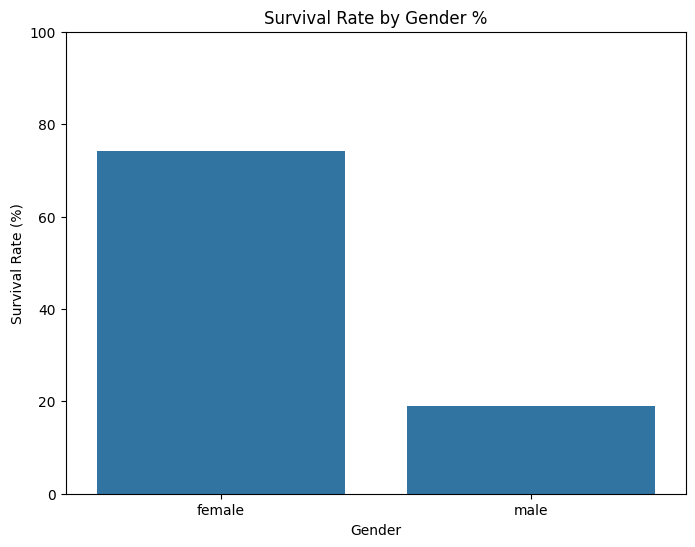

In [47]:
survival_rate_by_gender = titanic_df.groupby('sex')['survived'].mean()*100
plt.figure(figsize=(8,6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender %')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.ylim(0,100)
plt.show()

In [48]:
def display_bi_variate_counts(data, xcolumn, ycolumn):
  plt.figure(figsize=(8,6))
  sns.barplot(x=data.index, y=data.values)
  plt.title(f'{ycolumn} by {xcolumn} %')
  plt.xlabel(f'{xcolumn}')
  plt.ylabel(f'{ycolumn} (%)')
  plt.ylim(0,100)
  plt.show()

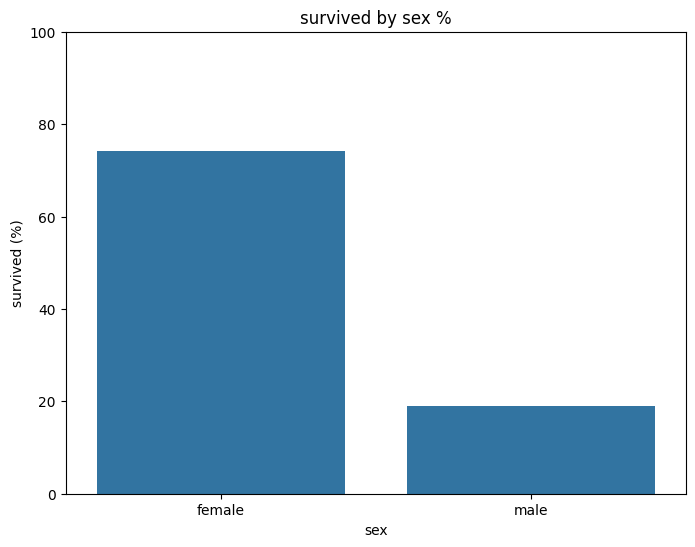

In [49]:
survival_rate_by_gender = titanic_df.groupby('sex')['survived'].mean()*100

display_bi_variate_counts(survival_rate_by_gender, 'sex', 'survived')

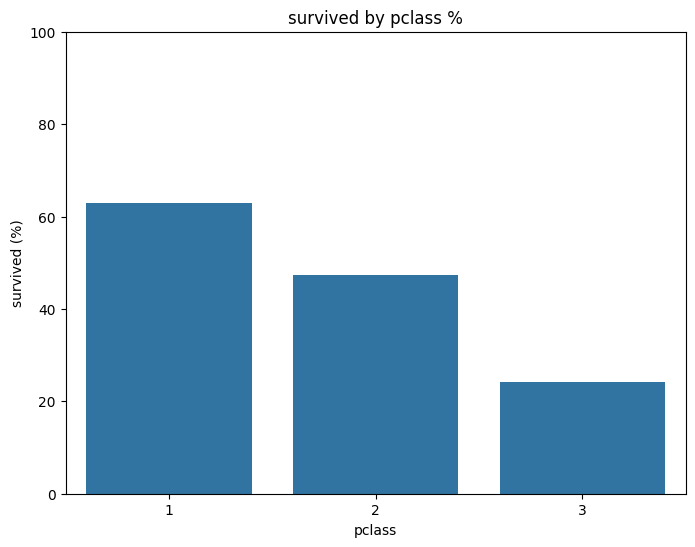

In [51]:
survival_rate_by_pclass = titanic_df.groupby('pclass')['survived'].mean()*100

display_bi_variate_counts(survival_rate_by_pclass, 'pclass', 'survived')

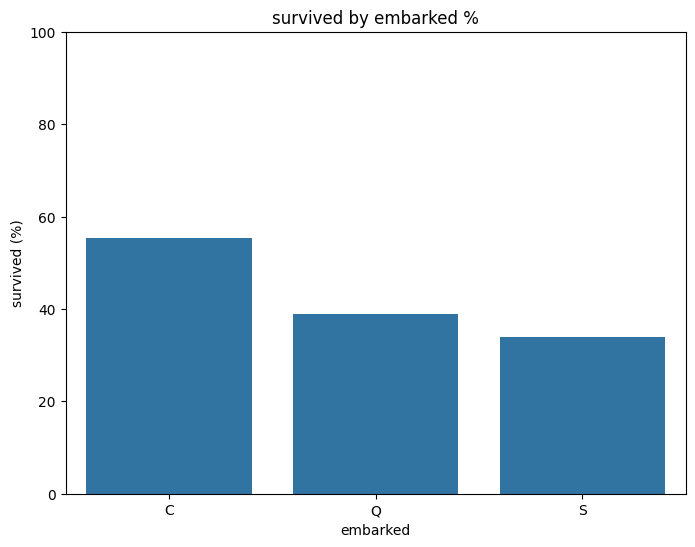

In [52]:
survival_rate_by_embarked = titanic_df.groupby('embarked')['survived'].mean()*100

display_bi_variate_counts(survival_rate_by_embarked, 'embarked', 'survived')

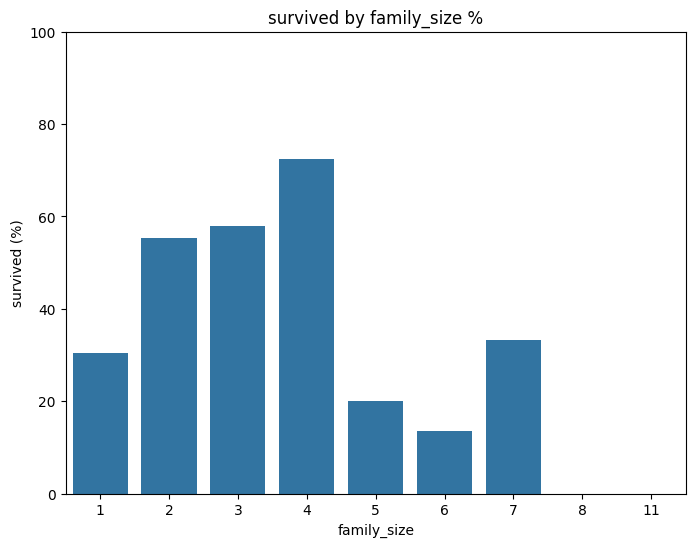

In [53]:
survival_rate_by_family_size = titanic_df.groupby('family_size')['survived'].mean()*100

display_bi_variate_counts(survival_rate_by_family_size, 'family_size', 'survived')

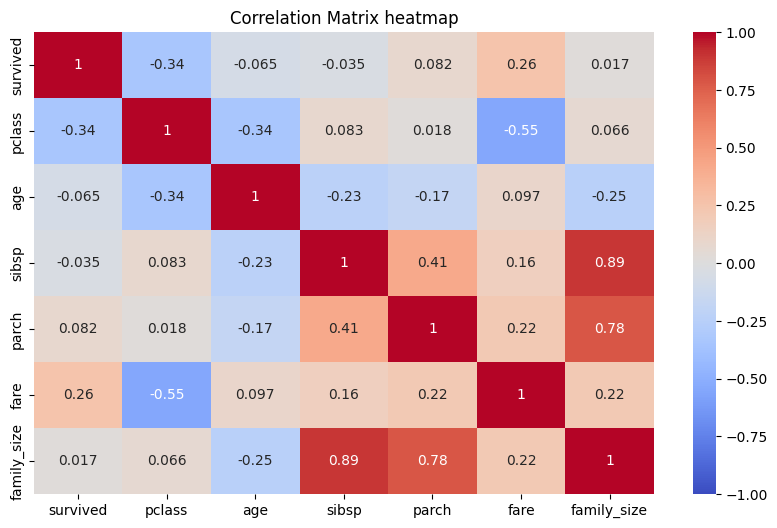

In [57]:
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize= (10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix heatmap')
plt.show()

In [60]:
print(titanic_df.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone  \
0         0       3    1  22.0      1      0   7.2500         2  False   
1         1       1    0  38.0      1      0  71.2833         0  False   
2         1       3    0  26.0      0      0   7.9250         2   True   
3         1       1    0  35.0      1      0  53.1000         2  False   
4         0       3    1  35.0      0      0   8.0500         2   True   

   family_size          age_band  
0            2  (16.336, 32.252]  
1            2  (32.252, 48.168]  
2            1  (16.336, 32.252]  
3            2  (32.252, 48.168]  
4            1  (32.252, 48.168]  


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_df['sex'] = le.fit_transform(titanic_df['sex'])
titanic_df['embarked'] = le.fit_transform(titanic_df['embarked'])